In [1]:
import os

import pandas as pd


import statsmodels.api as sm
from sklearn import datasets
from sklearn.linear_model import LinearRegression

import seaborn as sns
import matplotlib.pyplot as plt

from interpret.glassbox import  ExplainableBoostingRegressor
from interpret import show

pd.set_option('display.float_format', '{:.3f}'.format)
sns.set()

In [2]:
this_file_path = os.path.dirname(os.path.abspath("__file__"))
PLOTS_PATH = os.path.abspath(os.path.join(this_file_path, '..','figures'))

In [3]:
diabetes_data = datasets.load_diabetes()
variable_names = ['age', 
                  'sex',
                  'bmi',
                  'average blood pressure',
                  'total serum cholesterol',
                  'low-density lipoproteins',
                  'high-density lipoproteins',
                  'total cholesterol / HDL',
                  'log of serum triglycerides level',
                  'blood sugar level']
diabetes = pd.DataFrame(diabetes_data['data'], columns=variable_names)
diabetes['diabetes'] = diabetes_data['target']

X = diabetes.iloc[:,:-1]  # variables
y = diabetes['diabetes']  # target

diabetes.describe()

,age,sex,bmi,average blood pressure,total serum cholesterol,low-density lipoproteins,high-density lipoproteins,total cholesterol / HDL,log of serum triglycerides level,blood sugar level,diabetes
count,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000
mean,-0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,152.133
std,0.048,0.048,0.048,0.048,0.048,0.048,0.048,0.048,0.048,0.048,77.093
min,-0.107,-0.045,-0.090,-0.112,-0.127,-0.116,-0.102,-0.076,-0.126,-0.138,25.000
25%,-0.037,-0.045,-0.034,-0.037,-0.034,-0.030,-0.035,-0.039,-0.033,-0.033,87.000
50%,0.005,-0.045,-0.007,-0.006,-0.004,-0.004,-0.007,-0.003,-0.002,-0.001,140.500
75%,0.038,0.051,0.031,0.036,0.028,0.030,0.029,0.034,0.032,0.028,211.500
max,0.111,0.051,0.171,0.132,0.154,0.199,0.181,0.185,0.134,0.136,346.000


In [4]:
diabetes.shape

(442, 11)

In [5]:
diabetes.columns

Index(['age', 'sex', 'bmi', 'average blood pressure',
       'total serum cholesterol', 'low-density lipoproteins',
       'high-density lipoproteins', 'total cholesterol / HDL',
       'log of serum triglycerides level', 'blood sugar level', 'diabetes'],
      dtype='object')

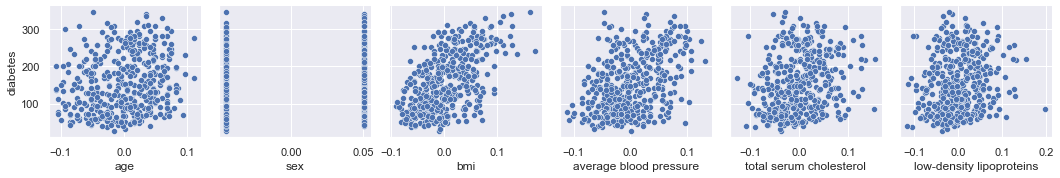

In [6]:
sns.pairplot(diabetes,y_vars=['diabetes'], x_vars = ['age', 'sex', 'bmi', 'average blood pressure',
       'total serum cholesterol', 'low-density lipoproteins']);

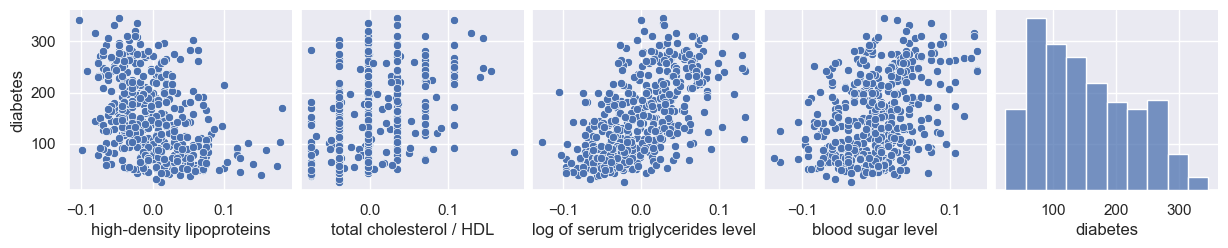

In [7]:
sns.pairplot(diabetes,y_vars=['diabetes'], x_vars = ['high-density lipoproteins', 'total cholesterol / HDL',
       'log of serum triglycerides level', 'blood sugar level', 'diabetes']);

# Linear Regression

In [8]:
regressor = LinearRegression()
regressor.fit(X,y)

weights = regressor.coef_
intercept=regressor.intercept_
weights, intercept

(array([ -10.0098663 , -239.81564367,  519.84592005,  324.3846455 ,
        -792.17563855,  476.73902101,  101.04326794,  177.06323767,
         751.27369956,   67.62669218]),
 152.13348416289597)

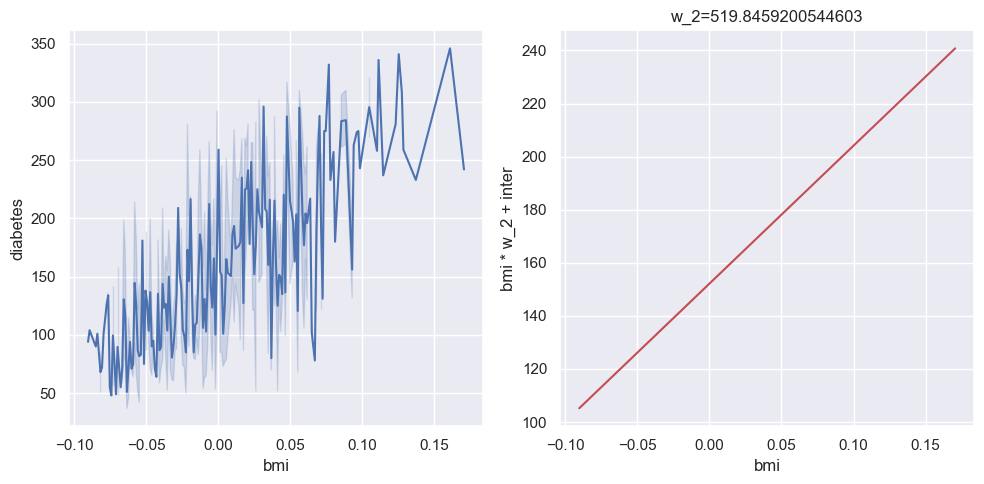

In [9]:
fig, axes = plt.subplots(1,2,figsize=(10,5));
sns.lineplot(x=diabetes['bmi'], y=diabetes['diabetes'],ax=axes[0]);
sns.lineplot(x=diabetes['bmi'], y=diabetes['bmi'] * weights[2]+intercept,color='r',ax=axes[1]);
axes[1].set_ylabel('bmi * w_2 + inter');
axes[1].set_title(f'w_2={weights[2]}')
fig.set_tight_layout('pad')

In [10]:
regressor.score(X,y)

0.5177484222203498

In [11]:
x = sm.add_constant(X)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               diabetes   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Fri, 03 Jun 2022   Prob (F-statistic):           3.83e-62
Time:                        16:30:19   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


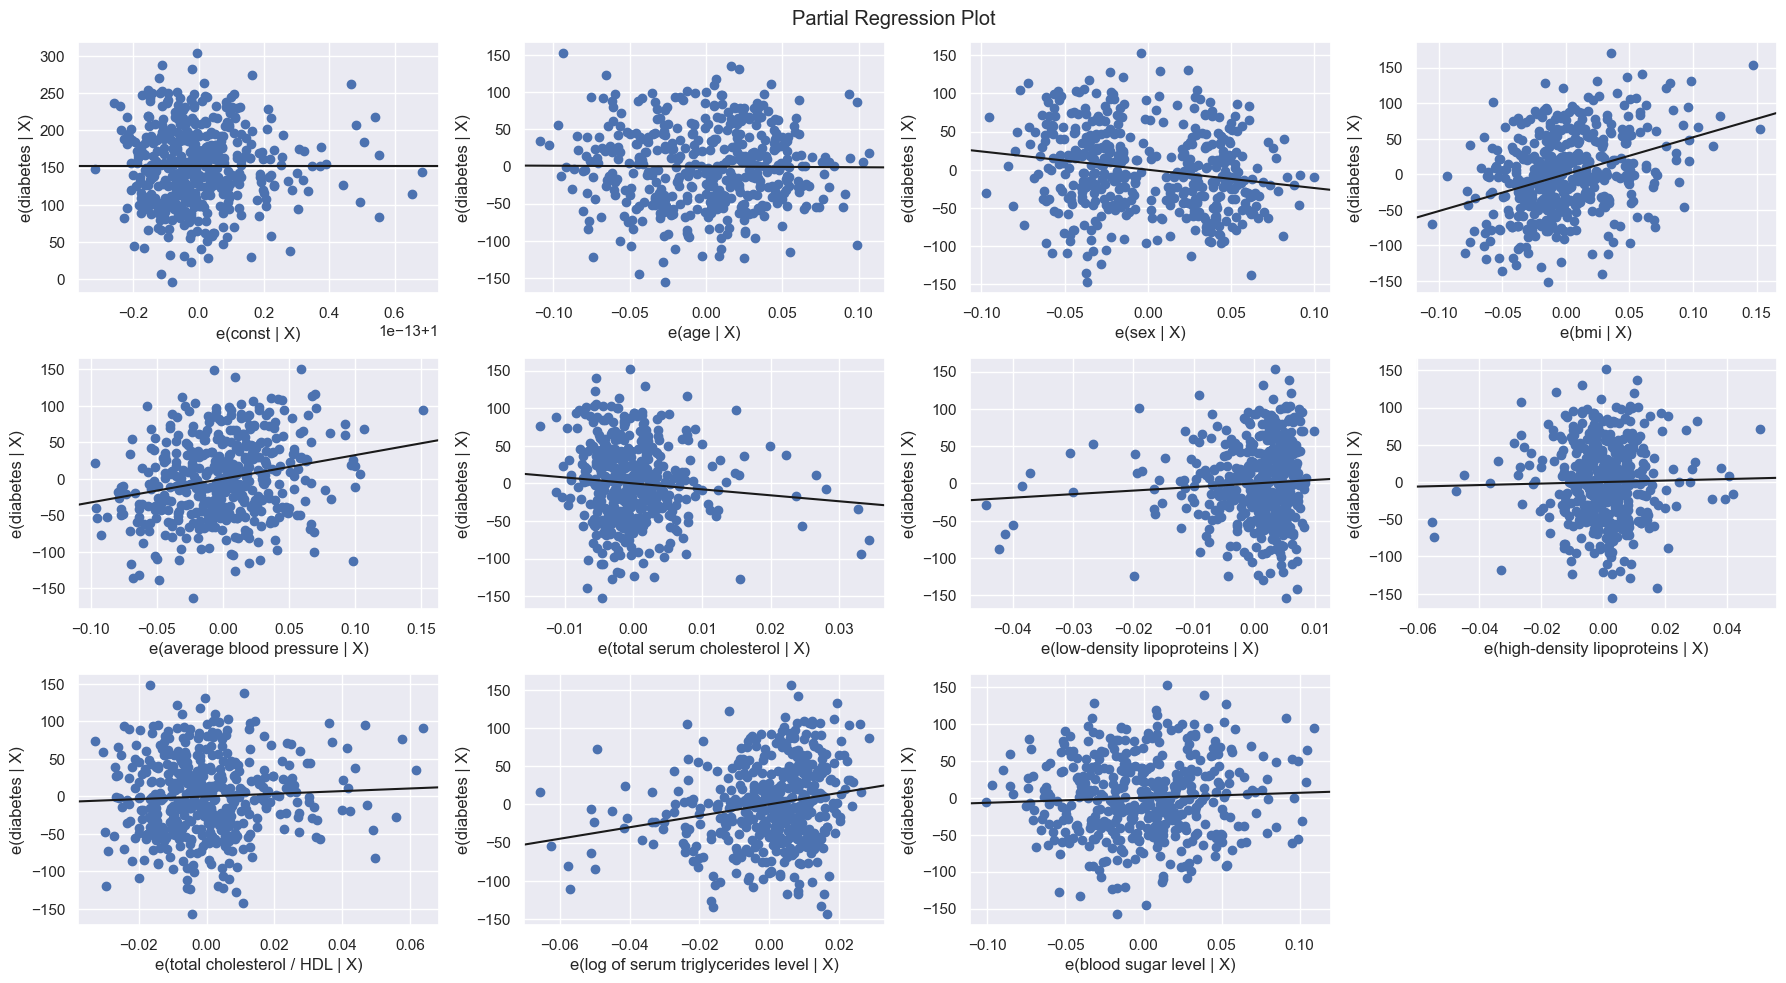

In [12]:
fig = plt.figure(figsize=(18,10));
sm.graphics.plot_partregress_grid(model,grid = (3,4) ,fig=fig);
fig.tight_layout(pad=1.0);

# EBM

In [13]:
seed = 1
ebm = ExplainableBoostingRegressor(random_state=seed)
ebm.fit(X, y)

ebm_global = ebm.explain_global()
# show(ebm_global)

ebm_global = ebm.explain_global()

In [14]:
fig = ebm_global.visualize(1)
fig.write_image("original_figure.png", format="png", engine="orca")  # Works


ValueError: 
The orca executable is required to export figures as static images,
but it could not be found on the system path.

Searched for executable 'orca' on the following path:
    C:\Users\bscuser\Documents\work\interpretable_models_seminar\venv/Scripts
    C:\Users\bscuser\Documents\work\interpretable_models_seminar\venv\Scripts
    C:\Program Files (x86)\Common Files\Oracle\Java\javapath
    C:\Windows\system32
    C:\Windows
    C:\Windows\System32\Wbem
    C:\Windows\System32\WindowsPowerShell\v1.0\
    C:\Windows\System32\OpenSSH\
    C:\Program Files\Git\cmd
    C:\ProgramData\chocolatey\bin
    C:\Program Files\Git LFS
    C:\Program Files\nodejs\
    C:\Program Files\Java\jdk1.8.0_211\bin
    C:\Program Files\Microsoft VS Code\bin
    C:\Program Files\Calibre2\
    C:\Program Files\Docker\Docker\resources\bin
    C:\ProgramData\DockerDesktop\version-bin
    C:\Users\bscuser\AppData\Local\Microsoft\WindowsApps
    C:\Users\bscuser\AppData\Roaming\npm
    C:\Program Files\Oracle\VirtualBox
    C:\Program Files\OpenSSL-Win64\bin
    C:\tools\mysql\current\bin
    
    C:\Users\bscuser\AppData\Local\Programs\Hyper\resources\bin

If you haven't installed orca yet, you can do so using conda as follows:

    $ conda install -c plotly plotly-orca

Alternatively, see other installation methods in the orca project README at
https://github.com/plotly/orca

After installation is complete, no further configuration should be needed.

If you have installed orca, then for some reason plotly.py was unable to
locate it. In this case, set the `plotly.io.orca.config.executable`
property to the full path of your orca executable. For example:

    >>> plotly.io.orca.config.executable = '/path/to/orca'

After updating this executable property, try the export operation again.
If it is successful then you may want to save this configuration so that it
will be applied automatically in future sessions. You can do this as follows:

    >>> plotly.io.orca.config.save()

If you're still having trouble, feel free to ask for help on the forums at
https://community.plot.ly/c/api/python


In [ ]:

for key in range(len(ebm_global.selector)):
    fig = ebm_global.visualize(key)
    fig.write_image(f"graph_{key}.pdf")

In [ ]:


ebm_local = ebm.explain_local(X[:5], y[:5])
show(ebm_local)
